# **K Means Clustering**

K-Means is an unsupervised machine learning algorithm used for clustering data points into K groups. It partitions a dataset into K distinct, non-overlapping clusters based on feature similarity.



K-Means follows an iterative approach to group data into K clusters:

1. Choose the Number of Clusters (K)
   - The user specifies K, the number of clusters.
2. Initialize K Cluster Centroids (Randomly)
   - Randomly place K centroids in the feature space.
3. Assign Each Data Point to the Nearest Centroid
   - Measure the distance (e.g., Euclidean distance) between each data point and the centroids.
   - Assign each data point to the closest centroid, forming K clusters.
4. Update Centroids
   - Compute the mean (average) of all points in a cluster and set this as the new centroid.
5. Repeat Steps 3 & 4 Until Convergence
   - Continue reassigning data points and updating centroids until:
   - Centroids stop changing significantly OR A maximum number of iterations is reached
6. Final Clusters are Formed
   - The dataset is now grouped into K well-defined clusters.


### **The Elbow Method**
The Elbow Method is a technique used to find the optimal number of clusters (K) in K-Means clustering.



Working :
1. Run K-Means with different values of K
  - Try K = 1, 2, 3, …, up to a reasonable number (e.g., 10).
2. Calculate the Within-Cluster Sum of Squares (WCSS) for each K
  - WCSS measures the compactness of clusters (how close points are to their centroids).
  - Lower WCSS means tighter, better-defined clusters.
3. Plot K vs. WCSS
  - On the X-axis → Number of clusters (K).
  - On the Y-axis → WCSS values.
4. Look for the "Elbow" Point
  - The point where WCSS stops decreasing significantly and forms an elbow shape in the graph.
This is the optimal K value.

### **Silhouette Score**
 For each data point 𝑖:
1. **Compute 𝑎(𝑖)**
a(i) = Average distance of 𝑖 from all other points in the same cluster (intra-cluster distance).
2. **Compute 𝑏(𝑖)**
b(i) = Average distance of 𝑖 from points in the nearest neighboring cluster (inter-cluster distance).
3. **Calculate Silhouette Score for each point:**
𝑆(𝑖)=𝑏(𝑖)−𝑎(𝑖)/max(𝑎(𝑖),𝑏(𝑖))
  
   where:

  - 𝑆(𝑖) ranges from -1 to 1
    - +1 → Well-clustered
    - 0 → Overlapping clusters
    - -1 → Misclassified points
4. Overall Silhouette Score is the mean of all 𝑆(𝑖) values.



In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df=pd.read_csv('/content/drive/MyDrive/datasets/ml/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


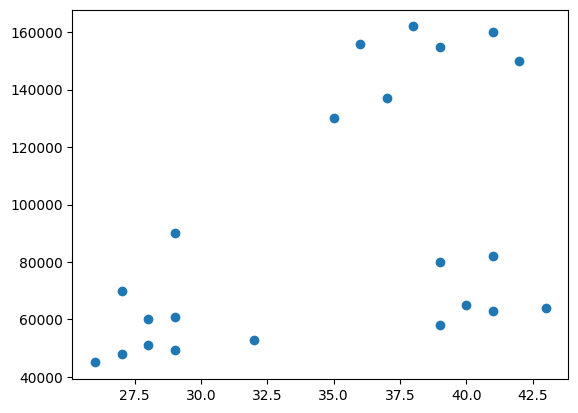

In [134]:
plt.scatter(df.Age,df['Income($)'])

In [135]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
ypred=km.fit_predict(df[['Age','Income($)']])
ypred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [136]:
km.score(df[['Age','Income($)']])

-1606229737.6785712

In [137]:
km.inertia_

1606229737.6785712

In [138]:
df['cluster']=ypred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [139]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

In [140]:
x=km.cluster_centers_[:,0]
y=km.cluster_centers_[:,1]

In [141]:
df0=df[df.cluster ==0]
df1=df[df.cluster ==1]
df2=df[df.cluster ==2]

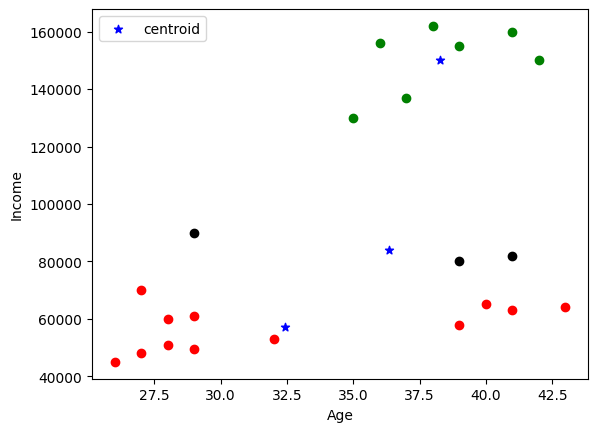

In [142]:
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(x,y,color='blue',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [143]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df[['Age', 'Income($)']], ypred)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.6817


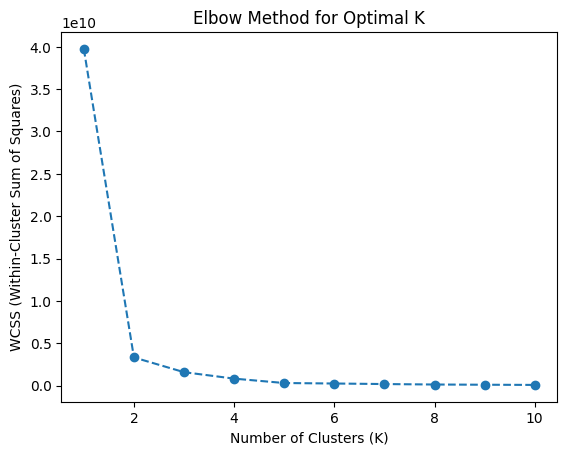

In [144]:
x = df[['Age', 'Income($)']]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [145]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(df[['Age']])
df.Age=mm.transform(df[['Age']])
mm.fit(df[['Income($)']])
df['Income($)']=mm.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [146]:
km=KMeans(n_clusters=3,random_state=42)
ypred=km.fit_predict(df[['Age','Income($)']])
ypred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [147]:
km.score(df[['Age','Income($)']])

-0.4750783498553097

In [148]:
km.inertia_

0.4750783498553097

In [149]:
df['cluster_scaled']=ypred
df

,Name,Age,Income($),cluster,cluster_scaled
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,0
5,Gautam,0.764706,0.940171,0,0
6,David,0.882353,0.982906,0,0
7,Andrea,0.705882,1.000000,0,0
8,Brad,0.588235,0.948718,0,0
9,Angelina,0.529412,0.726496,0,0


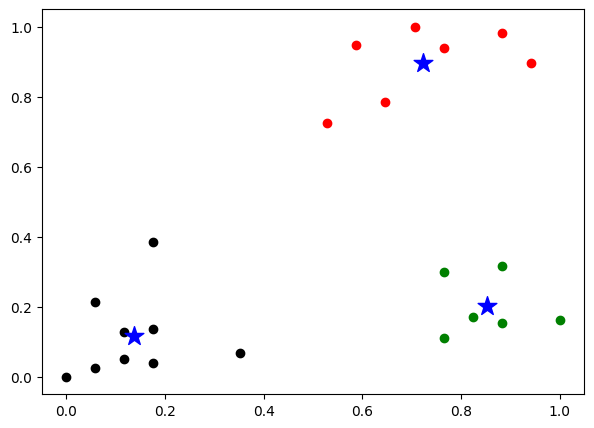

In [150]:
centers = km.cluster_centers_
plt.figure(figsize=(7,5))
colors = ['red', 'black', 'green']

for i in range(3):
    cluster_data = df[df.cluster_scaled == i]
    plt.scatter(cluster_data.Age, cluster_data['Income($)'], color=colors[i], label=f'Cluster {i}')

plt.scatter(centers[:, 0], centers[:, 1], color='blue', marker='*', s=200, label='Centroid')


In [151]:
score = silhouette_score(df[['Age', 'Income($)']], ypred)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7130


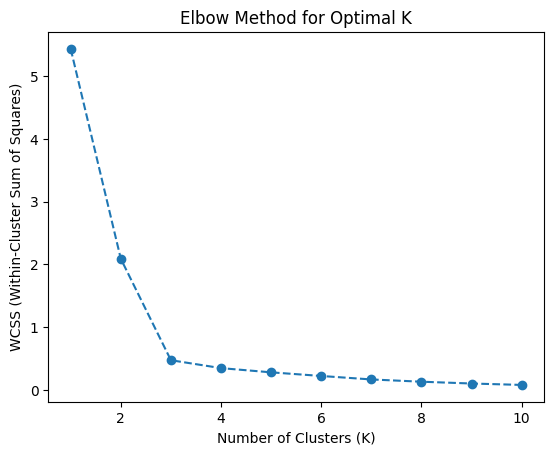

In [152]:
x = df[['Age', 'Income($)']]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
